In [3]:
# %matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read csv
exams = pd.read_csv('student_performance.csv')


In [4]:
exams.head()


,gender,ethnicity,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
X = exams[['gender','ethnicity','parent_edu','lunch','test_prep']]
y = exams['math_score'].values.reshape(-1,1)
print(X.shape, y.shape)

(1000, 5) (1000, 1)


In [9]:
data = X.copy()
data_binary_encoded = pd.get_dummies(data)

In [10]:
data_binary_encoded.head()

,gender_female,gender_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parent_edu_associate's degree,parent_edu_bachelor's degree,parent_edu_high school,parent_edu_master's degree,parent_edu_some college,parent_edu_some high school,lunch_free/reduced,lunch_standard,test_prep_completed,test_prep_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [25]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=80)

X_train.head()

,gender_female,gender_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parent_edu_associate's degree,parent_edu_bachelor's degree,parent_edu_high school,parent_edu_master's degree,parent_edu_some college,parent_edu_some high school,lunch_free/reduced,lunch_standard,test_prep_completed,test_prep_none
969,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
785,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
744,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
394,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
235,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1


In [26]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [27]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

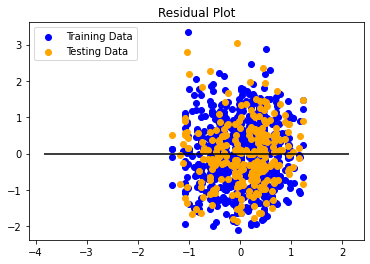

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
r2 = model.score(X_test_scaled, y_test_scaled)

In [30]:
print(f"R2: {r2}")

R2: 0.23765200768172912


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)
rf.score(X,y)

<ipython-input-22-f57f0f284177>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(X, y)


0.252

In [23]:
importances = rf.feature_importances_
importances

array([0.05434629, 0.05724791, 0.0642025 , 0.07425538, 0.07900499,
       0.07451424, 0.06074564, 0.06062814, 0.05977529, 0.06282261,
       0.04474196, 0.05996731, 0.06449707, 0.03153667, 0.03087055,
       0.06063644, 0.06020701])

In [24]:
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.0790049883389637, 'ethnicity_group C'),
 (0.07451423846720642, 'ethnicity_group D'),
 (0.07425537717795348, 'ethnicity_group B'),
 (0.06449706708268865, 'parent_edu_some high school'),
 (0.0642025016587172, 'ethnicity_group A'),
 (0.06282261224102845, 'parent_edu_high school'),
 (0.060745641040178586, 'ethnicity_group E'),
 (0.06063644120937125, 'test_prep_completed'),
 (0.0606281357106889, "parent_edu_associate's degree"),
 (0.06020701357887605, 'test_prep_none'),
 (0.059967310762117525, 'parent_edu_some college'),
 (0.05977528878031254, "parent_edu_bachelor's degree"),
 (0.05724791205378714, 'gender_male'),
 (0.05434628827318098, 'gender_female'),
 (0.04474196102514919, "parent_edu_master's degree"),
 (0.031536674759473506, 'lunch_free/reduced'),
 (0.03087054784030635, 'lunch_standard')]

In [31]:
features = sorted(zip(rf.feature_importances_, X), reverse=True)

In [33]:
df = pd.DataFrame(features)
df.head(50)

,0,1
0,0.079005,ethnicity_group C
1,0.074514,ethnicity_group D
2,0.074255,ethnicity_group B
3,0.064497,parent_edu_some high school
4,0.064203,ethnicity_group A
5,0.062823,parent_edu_high school
6,0.060746,ethnicity_group E
7,0.060636,test_prep_completed
8,0.060628,parent_edu_associate's degree
9,0.060207,test_prep_none


In [37]:
df = df.rename(columns = {0:'Importance',
                    1:'Features'})

In [38]:
df

,Importance,Features
0,0.079005,ethnicity_group C
1,0.074514,ethnicity_group D
2,0.074255,ethnicity_group B
3,0.064497,parent_edu_some high school
4,0.064203,ethnicity_group A
5,0.062823,parent_edu_high school
6,0.060746,ethnicity_group E
7,0.060636,test_prep_completed
8,0.060628,parent_edu_associate's degree
9,0.060207,test_prep_none
